In [870]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import demoji
import seaborn as sns
# read data from csv file 
df_amazon=pd.read_csv('amazonReview.csv', encoding='utf-8')
df_imdb=pd.read_csv('imdb_sup.csv',encoding='utf-8')

In [871]:
df_amazon

Reviewer name  \
0             Genuine buyer   
1            CHETAN SHETTER   
2             Kiran Kumar M   
3                 Raj Patel   
4       SANJAY KUMAR TIWARI   
...                     ...   
449774             Dipchand   
449775      Amazon Customer   
449776        MAYANK MISHRA   
449777                  Zan   
449778              SK Raju   

                                                    title  \
0                                           Pros and cons   
1       Never Expected in this price range... I Assure...   
2       Bass bastler, Awesome HD quality sound, rockin...   
3                             Maybe buy boat basshead 100   
4          Superb head stereo better than leading brands.   
...                                                   ...   
449774                                           Not good   
449775                                   Need replacement   
449776                     Stopped working after 1 month.   
449777                                     Cheap Quality.   
449778                       First few days only it works   

                                              Review body       Review rating  \
0       Great quality and the sound is actually great....  5.0 out of 5 stars   
1       I've been using this from past 6 months. This ...  5.0 out of 5 stars   
2       Perfect bass and nice one. Superb sound and it...  5.0 out of 5 stars   
3       Here is the review after 1 week of usePros:1.B...  4.0 out of 5 stars   
4       Purchased after seeing review with suspicion t...  5.0 out of 5 stars   
...                                                   ...                 ...   
449774  One side head phone is not working within 10 d...  1.0 out of 5 stars   
449775  Quality is good. And there is some damage near...  1.0 out of 5 stars   
449776  Your browser does not support HTML5 video.  Af...  3.0 out of 5 stars   
449777  This product is of very cheap quality. Wouldn'...  1.0 out of 5 stars   
449778  Bad luck to buy, within month went bad does no...  2.0 out of 5 stars   

       sentiment  
0       positive  
1       positive  
2       positive  
3       positive  
4       positive  
...          ...  
449774  negative  
449775  negative  
449776  negative  
449777  negative  
449778  negative  

[449779 rows x 5 columns]

In [872]:
len(df_amazon['Reviewer name'].unique())

232432

In [873]:
df_imdb

Review  Rating  Sentiment
0      Kurt Russell's chameleon-like performance, cou...      10          1
1      It was extremely low budget(it some scenes it ...       8          1
2      James Cagney is best known for his tough chara...       8          1
3      Following the brilliant "Goyôkiba" (aka. "Hanz...       8          1
4      One of the last classics of the French New Wav...      10          1
...                                                  ...     ...        ...
49995  (spoiler) it could be the one the worst movie ...       4          0
49996  So, you've seen the Romero movies, yes? And yo...       1          0
49997  Just listen to the Broadway cast album and to ...       3          0
49998  I have been a fan of the Carpenters for a long...       3          0
49999  Set in 1945, Skenbart follows a failed Swedish...       1          0

[50000 rows x 3 columns]

In [874]:
# extract the review text and rating score that we need from the origin dataset
df_amazon_rrs=df_amazon[['Reviewer name','Review body','Review rating','sentiment']].rename(
    columns={'Reviewer name':'ReviewerName','Review body':'Review','Review rating':'Rating','sentiment':'Sentiment'})
df_imdb_rrs=df_imdb[['Review','Rating','Sentiment']]

In [875]:
#check if there is missing value
print(df_amazon_rrs.isnull().sum())
print(df_imdb_rrs.isnull().sum())

ReviewerName        5
Review             64
Rating          38035
Sentiment           0
dtype: int64
Review       0
Rating       0
Sentiment    0
dtype: int64


In [876]:
# there are missing values in amazon reviews.The dataset is quite big, so we just delete them 
df_amazon_rrs=df_amazon_rrs.dropna(how='any')
df_amazon_rrs.isnull().sum()

ReviewerName    0
Review          0
Rating          0
Sentiment       0
dtype: int64

In [877]:
print(df_amazon_rrs['Sentiment'].value_counts())
print(df_imdb_rrs['Sentiment'].value_counts())

positive    347270
negative     64415
Name: Sentiment, dtype: int64
1    25000
0    25000
Name: Sentiment, dtype: int64


In [878]:
def get_num_rating(text):
    list_text=text.split()
    score=list_text[0].split('.')
    return int(score[0])

def get_lbel_rating(text):
    if text=='positive':
        return 1
    else:
        return 0

In [879]:
df_amazon_rrs['Rating']=df_amazon_rrs.apply(lambda x: get_num_rating(x['Rating']),axis=1)
df_amazon_rrs['Sentiment']=df_amazon_rrs.apply(lambda x: get_lbel_rating(x['Sentiment']),axis=1)
df_amazon_rrs

ReviewerName  \
0             Genuine buyer   
1            CHETAN SHETTER   
2             Kiran Kumar M   
3                 Raj Patel   
4       SANJAY KUMAR TIWARI   
...                     ...   
449774             Dipchand   
449775      Amazon Customer   
449776        MAYANK MISHRA   
449777                  Zan   
449778              SK Raju   

                                                   Review  Rating  Sentiment  
0       Great quality and the sound is actually great....       5          1  
1       I've been using this from past 6 months. This ...       5          1  
2       Perfect bass and nice one. Superb sound and it...       5          1  
3       Here is the review after 1 week of usePros:1.B...       4          1  
4       Purchased after seeing review with suspicion t...       5          1  
...                                                   ...     ...        ...  
449774  One side head phone is not working within 10 d...       1          0  
449775  Quality is good. And there is some damage near...       1          0  
449776  Your browser does not support HTML5 video.  Af...       3          0  
449777  This product is of very cheap quality. Wouldn'...       1          0  
449778  Bad luck to buy, within month went bad does no...       2          0  

[411685 rows x 4 columns]

In [880]:
am_x=[0,1]
am_y=[64417,347271]
plt.subplot(121)
plt.bar(am_x,am_y,width=0.2)
for a,b in zip(am_x,am_y):
    plt.text(a, b+100, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.xticks(am_x)
plt.xlabel('Sentiment')
plt.ylabel('Count')

am_rt_x=[1,2,3,4,5]
am_rt_y=df_amazon_rrs['Rating'].value_counts()
am_rt_y=am_rt_y[::-1]
plt.subplot(122)
plt.bar(am_rt_x,am_rt_y,width=0.2)
for a,b in zip(am_rt_x,am_rt_y):
    plt.text(a, b+100, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.xticks(am_rt_x)
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

In [881]:
amazon_pos=df_amazon_rrs[df_amazon_rrs['Sentiment']==1].sample(n=64415)
amazon_neg=df_amazon_rrs[df_amazon_rrs['Sentiment']==0]
df_amazon_rrs=pd.concat([amazon_pos,amazon_neg])

In [882]:
df_imdb_rrs['Rating'].value_counts()

1     10122
10     9731
8      5859
4      5331
3      4961
7      4803
9      4607
2      4586
Name: Rating, dtype: int64

Text(0, 0.5, 'Count')

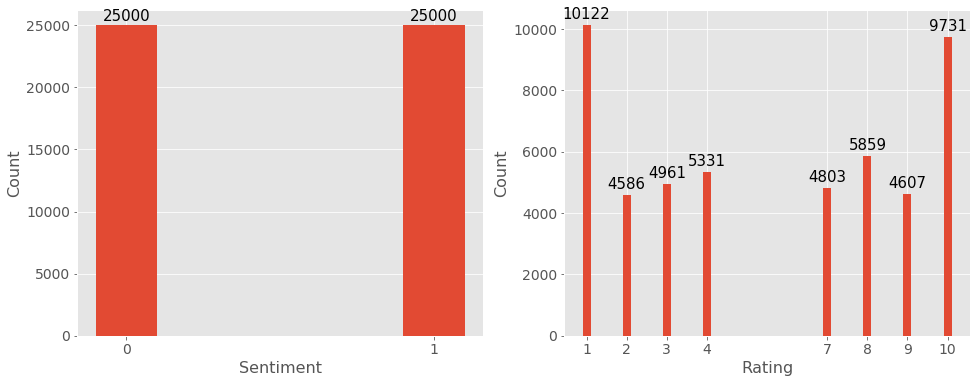

In [883]:
imdb_x=[0,1]
imdb_y=[25000,25000]
plt.subplot(121)
plt.bar(imdb_x,imdb_y,width=0.2)
for a,b in zip(imdb_x,imdb_y):
    plt.text(a, b+100, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.xticks(imdb_x)
plt.xlabel('Sentiment')
plt.ylabel('Count')

imdb_rt_x=[1,2,3,4,7,8,9,10]
imdb_rt_y=[df_imdb_rrs['Rating'].value_counts()[i] for i in imdb_rt_x]
plt.subplot(122)
plt.bar(imdb_rt_x,imdb_rt_y,width=0.2)
for a,b in zip(imdb_rt_x,imdb_rt_y):
    plt.text(a, b+100, '%.0f' % b, ha='center', va= 'bottom',fontsize=15)
plt.xticks(imdb_rt_x)
plt.xlabel('Rating')
plt.ylabel('Count')

In [884]:
import re,string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

stopwords=nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

nltk_sw=nltk.corpus.stopwords.words('english')
nltk_sw=nltk_sw[:-36]
negative_words=['nor','not','no','but','don\'t']
stop=[]
for i in nltk_sw:
    if i not in negative_words:
        stop.append(i)


def remove_noise(text):
    text=demoji.replace_with_desc(text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\(.*?\)', ' ', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f917-\U0001f937"
        u"\U0001F600-\U0001F64F"  # emoticons
        u'\u2022'
        u'\u092c'
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)
   
    return text

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def cleaning_reviews(text):
    text=str(text)
    text=text.lower()
    text=remove_noise(text)
    text=text.split()
    nt=[]
    for word in text:
        if word not in string.punctuation and word.startswith(r'\u') == False and word.startswith(r'\x')== False:
            nt.append(word)
    text=nt
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = nltk.pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Frantol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Frantol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Frantol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [885]:
df_amazon_cleaned=df_amazon_rrs.copy()
df_imdb_cleaned=df_imdb_rrs.copy()
df_amazon_cleaned['Review']=df_amazon_cleaned['Review'].apply(lambda x: cleaning_reviews(x))
df_imdb_cleaned['Review']=df_imdb_cleaned['Review'].apply(lambda x: cleaning_reviews(x))

In [886]:
# The Compound score is a metric that calculates the sum of all the lexicon ratings -
# which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
# positive sentiment : (compound score >= 0.05) 
# neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
# negative sentiment : (compound score <= -0.05)
import time
vader_analyzer=SentimentIntensityAnalyzer()

In [887]:
def vader_senti_values(text):
    text=str(text)
    score=vader_analyzer.polarity_scores(text)
    return score
    

In [888]:
# generate a new column 'senti_values' based on review texts by using vader
# time_start=time.time()
df_amazon_cleaned['VADER_senti_values']=df_amazon_cleaned.apply(lambda x: vader_senti_values(x['Review'])
                                                                      ,axis=1)
df_amazon_cleaned['VADER_neg']=df_amazon_cleaned['VADER_senti_values'].apply(lambda x: x['neg'])

df_amazon_cleaned['VADER_neu']=df_amazon_cleaned['VADER_senti_values'].apply(lambda x: x['neu'])

df_amazon_cleaned['VADER_pos']=df_amazon_cleaned['VADER_senti_values'].apply(lambda x: x['pos'])

df_amazon_cleaned['VADER_compound']=df_amazon_cleaned['VADER_senti_values'].apply(lambda x: x['compound'])
# time_end=time.time()
# print('Time taken on amazon reviews by using VADER: ',time_end-time_start )

In [1104]:
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=df_amazon_cleaned.corr(),
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [889]:
df_amazon_cl2=df_amazon_cleaned.copy()
df_amazon_cl2=df_amazon_cl2[df_amazon_cl2['Rating']!=3]
df_amazon_cl2

ReviewerName                                             Review  \
161479         prabhu D                   super sound quality bass quality   
83137       Shashank s.                     browser not support video good   
57161     Nandi Animesh    overall nce product specially spd nd huge space   
285693          Dhiraj   recived time best quality base good noise canc...   
236537           ganesh                                       good product   
...                 ...                                                ...   
449772     Bipin Mistry  donot trust brand product stop work not day se...   
449774         Dipchand  one side head phone not work within day produc...   
449775  Amazon Customer  quality good damage near mic happend week use ...   
449777              Zan             product cheap quality wouldn recommend   
449778          SK Raju  bad luck buy within month go bad not give soun...   

        Rating  Sentiment                                 VADER_senti_values  \
161479       5          1  {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...   
83137        4          1  {'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'comp...   
57161        5          1  {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...   
285693       5          1  {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'comp...   
236537       5          1  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...   
...        ...        ...                                                ...   
449772       1          0  {'neg': 0.29, 'neu': 0.404, 'pos': 0.306, 'com...   
449774       1          0  {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'comp...   
449775       1          0  {'neg': 0.11, 'neu': 0.787, 'pos': 0.102, 'com...   
449777       1          0  {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...   
449778       2          0  {'neg': 0.372, 'neu': 0.372, 'pos': 0.256, 'co...   

        VADER_neg  VADER_neu  VADER_pos  VADER_compound  
161479      0.000      0.506      0.494          0.5994  
83137       0.609      0.391      0.000         -0.5667  
57161       0.000      0.753      0.247          0.3182  
285693      0.000      0.458      0.542          0.7964  
236537      0.000      0.256      0.744          0.4404  
...           ...        ...        ...             ...  
449772      0.290      0.404      0.306          0.1265  
449774      0.194      0.806      0.000         -0.3412  
449775      0.110      0.787      0.102         -0.0387  
449777      0.000      0.615      0.385          0.3612  
449778      0.372      0.372      0.256         -0.4915  

[111012 rows x 9 columns]

In [890]:
df_amazon_cl2.corr()

Rating  Sentiment  VADER_neg  VADER_neu  VADER_pos  \
Rating          1.000000   0.966978  -0.551555  -0.378235   0.658433   
Sentiment       0.966978   1.000000  -0.545940  -0.378197   0.654928   
VADER_neg      -0.551555  -0.545940   1.000000  -0.087874  -0.539841   
VADER_neu      -0.378235  -0.378197  -0.087874   1.000000  -0.786635   
VADER_pos       0.658433   0.654928  -0.539841  -0.786635   1.000000   
VADER_compound  0.687878   0.682738  -0.712661  -0.272640   0.670238   

                VADER_compound  
Rating                0.687878  
Sentiment             0.682738  
VADER_neg            -0.712661  
VADER_neu            -0.272640  
VADER_pos             0.670238  
VADER_compound        1.000000

In [891]:
# time_start=time.time()
df_imdb_cleaned['VADER_senti_values']=df_imdb_cleaned.apply(lambda x: vader_senti_values(x['Review'])
                                                                      ,axis=1)
# time_end=time.time()
# print('Time taken on imdb reviews by using VADER: ',time_end-time_start )

In [892]:
df_imdb_cleaned['VADER_neg']=df_imdb_cleaned['VADER_senti_values'].apply(lambda x: x['neg'])

df_imdb_cleaned['VADER_neu']=df_imdb_cleaned['VADER_senti_values'].apply(lambda x: x['neu'])

df_imdb_cleaned['VADER_pos']=df_imdb_cleaned['VADER_senti_values'].apply(lambda x: x['pos'])

df_imdb_cleaned['VADER_compound']=df_imdb_cleaned['VADER_senti_values'].apply(lambda x: x['compound'])


In [893]:
df_imdb_cleaned.corr()

Rating  Sentiment  VADER_neg  VADER_neu  VADER_pos  \
Rating          1.000000   0.941534  -0.476394  -0.003743   0.436661   
Sentiment       0.941534   1.000000  -0.452264  -0.010795   0.421462   
VADER_neg      -0.476394  -0.452264   1.000000  -0.424416  -0.504303   
VADER_neu      -0.003743  -0.010795  -0.424416   1.000000  -0.567849   
VADER_pos       0.436661   0.421462  -0.504303  -0.567849   1.000000   
VADER_compound  0.463141   0.444525  -0.760671   0.024044   0.668570   

                VADER_compound  
Rating                0.463141  
Sentiment             0.444525  
VADER_neg            -0.760671  
VADER_neu             0.024044  
VADER_pos             0.668570  
VADER_compound        1.000000

In [894]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import palettable

In [895]:
stratifiedKFolds = StratifiedKFold(n_splits=10, shuffle=False)
X_amazon=df_amazon_cleaned['Review']
Y_amazon=df_amazon_cleaned['Sentiment']
RT_amazon=df_amazon_cleaned['Rating']

X_amazon_cl2=df_amazon_cl2['Review']
Y_amazon_cl2=df_amazon_cl2['Sentiment']
RT_amazon_cl2=df_amazon_cl2['Rating']

X_imdb=df_imdb_cleaned['Review']
Y_imdb=df_imdb_cleaned['Sentiment']
RT_imdb=df_imdb_cleaned['Rating']

In [896]:
def get_new_nb_df(X,Y,RT):
    list_new_df=[]
    for train_idx, test_idx in stratifiedKFolds.split(X, Y):

        x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        rt_train, rt_test =RT.iloc[train_idx], RT.iloc[test_idx]
        cv=TfidfVectorizer()

        vector_train=cv.fit_transform(x_train)
        vector_test=cv.transform(x_test)

        mnb=MultinomialNB()
        mnb.fit(vector_train,y_train)
        
        print('The Accuracy of Classification: ',mnb.score(vector_test,y_test))
        sentiment_proba=np.around(mnb.predict_proba(vector_test),3)[:,1]
        sentiment_proba=np.around(mnb.predict_proba(vector_test),3)[:,0]

        xdf_test=pd.DataFrame(X.iloc[test_idx])
        ydf_test=pd.DataFrame(Y.iloc[test_idx])
        rtdf_test=pd.DataFrame(RT.iloc[test_idx])
        test_index=xdf_test.index
        senti_prob_test=pd.DataFrame(sentiment_proba).set_index(test_index)

        test_df_new=xdf_test.join(rtdf_test).join(ydf_test).join(senti_prob_test)
        list_new_df.append(test_df_new)
        
    new_df_amazon=pd.concat(list_new_df)
    new_df_amazon.columns=['Review','Rating','Sentiment','Pos_prob']
    
    return new_df_amazon

In [897]:
df_amazon_nb=get_new_nb_df(X_amazon,Y_amazon,RT_amazon)
df_amazon_nb.corr()

The Accuracy of Classification:  0.8573313669176434
The Accuracy of Classification:  0.8508887681440658
The Accuracy of Classification:  0.8385469223007064
The Accuracy of Classification:  0.8376154622370566
The Accuracy of Classification:  0.8205386944034775
The Accuracy of Classification:  0.8352868120779322
The Accuracy of Classification:  0.8514321198478615
The Accuracy of Classification:  0.8477062795932624
The Accuracy of Classification:  0.8469300628735543
The Accuracy of Classification:  0.8588838003570597


Rating  Sentiment  Pos_prob
Rating     1.000000   0.905550  0.768398
Sentiment  0.905550   1.000000  0.733353
Pos_prob   0.768398   0.733353  1.000000

In [898]:
am_nb_corr=df_amazon_nb.corr()
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=am_nb_corr,
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [899]:
df_amazon_nb2=get_new_nb_df(X_amazon_cl2,Y_amazon_cl2,RT_amazon_cl2)
df_amazon_nb2.corr()

The Accuracy of Classification:  0.8955143217438299
The Accuracy of Classification:  0.8900198162493245
The Accuracy of Classification:  0.8821727772272768
The Accuracy of Classification:  0.8800108098369517
The Accuracy of Classification:  0.8741554814881543
The Accuracy of Classification:  0.8778488424466264
The Accuracy of Classification:  0.8875776957030899
The Accuracy of Classification:  0.8792000720655797
The Accuracy of Classification:  0.8701017926312945
The Accuracy of Classification:  0.8821727772272768


Rating  Sentiment  Pos_prob
Rating     1.000000   0.966978  0.807777
Sentiment  0.966978   1.000000  0.801330
Pos_prob   0.807777   0.801330  1.000000

In [900]:
am_nb2_corr=df_amazon_nb2.corr()
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=am_nb2_corr,
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [901]:
df_imdb_nb=get_new_nb_df(X_imdb,Y_imdb,RT_imdb)
df_imdb_nb.corr()

The Accuracy of Classification:  0.8554
The Accuracy of Classification:  0.8522
The Accuracy of Classification:  0.8666
The Accuracy of Classification:  0.8594
The Accuracy of Classification:  0.8624
The Accuracy of Classification:  0.8634
The Accuracy of Classification:  0.8666
The Accuracy of Classification:  0.8676
The Accuracy of Classification:  0.8594
The Accuracy of Classification:  0.858


Rating  Sentiment  Pos_prob
Rating     1.000000   0.941534  0.771674
Sentiment  0.941534   1.000000  0.761926
Pos_prob   0.771674   0.761926  1.000000

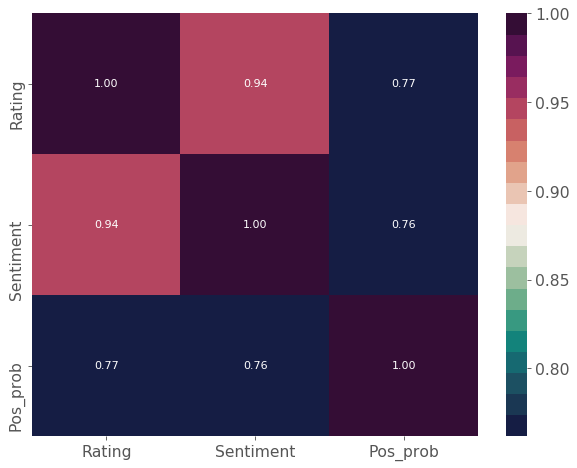

In [902]:
imdb_nb_corr=df_imdb_nb.corr()
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=imdb_nb_corr,
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [903]:
df_imdb_nb[(df_imdb_nb['Pos_prob']!=0.0 )&(df_imdb_nb['Pos_prob']!=1.0)]

Review  Rating  Sentiment  \
0      kurt russell chameleon like performance couple...      10          1   
1      extremely low budget scene look like record ho...       8          1   
2      james cagney best know tough character gangste...       8          1   
3      follow brilliant goyôkiba aka hanzo razor swor...       8          1   
4      one last classic french new wave direction cin...      10          1   
...                                                  ...     ...        ...   
49995  spoiler could one bad movie see might like lik...       4          0   
49996  see romero movie yes see jacob ladder right la...       1          0   
49997  listen broadway cast album voice barbara harri...       3          0   
49998  fan carpenter long time read biography watch s...       3          0   
49999  set skenbart follow fail swedish book editor d...       1          0   

       Pos_prob  
0         0.773  
1         0.374  
2         0.724  
3         0.830  
4         0.827  
...         ...  
49995     0.127  
49996     0.027  
49997     0.773  
49998     0.700  
49999     0.278  

[50000 rows x 4 columns]

In [904]:
########################
# Train regression model
########################

In [1088]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

def train_linear_regression(X,Y):
    print('Linear Regression')
    acc_list=[]
    mse_list=[]
    mae_list=[]
    rmse_list=[]
    nrmse_list=[]
    r2_list=[]
    
    for train_idx, test_idx in stratifiedKFolds.split(X, Y):
        x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
        x_train=x_train.values.reshape(-1,1)
        x_test=x_test.values.reshape(-1,1)
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    
        linreg=LinearRegression()
        linreg.fit(x_train,y_train)

#         print('Intercept: ',linreg.intercept_)
#         print('Coef: ',linreg.coef_)

        y_pred= linreg.predict(x_test)
        y_pred=np.trunc(y_pred).astype(int)
#         print('Prediction of test: ',y_pred)
#         print('Real value of test: ',y_test)

        acc_score=linreg.score(x_test,y_test)
        MSE= metrics.mean_squared_error(y_test, y_pred)
        MAE=metrics.mean_absolute_error(y_test, y_pred)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        R2_SCORE=metrics.r2_score(y_test, y_pred)
        NRMSE = RMSE/(np.max(y_test)-np.min(y_test))

        
        acc_list.append(acc_score)
        mse_list.append(MSE)
        mae_list.append(MAE)
        rmse_list.append(RMSE)
        nrmse_list.append(NRMSE)
        r2_list.append(R2_SCORE)
    print('Mean accuracy: ',abs(np.mean(acc_list)))
    print('Mean MSE: ',np.mean(mse_list))
    print('Mean MAE: ',np.mean(mae_list))
    print('Mean RMSE: ',np.mean(rmse_list))
    print('Mean R2-SCORE: ',abs(np.mean(r2_list)))
    print('Mean NRMSE',np.mean(nrmse_list))
    

In [1090]:

def train_gbm_regression(X,Y):
        print('---------------------------------')
        print('Gradient Boosting regression')
        acc_list=[]
        mse_list=[]
        mae_list=[]
        rmse_list=[]
        r2_list=[]
        nrmse_list=[]
        
        for train_idx, test_idx in stratifiedKFolds.split(X, Y):
            x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
            x_train=x_train.values.reshape(-1,1)
            x_test=x_test.values.reshape(-1,1)
            y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

            params = {
            "n_estimators": 1000,
            "max_depth": 4,
            "min_samples_split": 2,
            "learning_rate": 0.1,
            }

            gbm=GradientBoostingRegressor(**params)
            gbm.fit(x_train,y_train)

    #         print('Intercept: ',linreg.intercept_)
    #         print('Coef: ',linreg.coef_)

            y_pred= gbm.predict(x_test)
            y_pred=np.trunc(y_pred).astype(int)
    #         print('Prediction of test: ',y_pred)
    #         print('Real value of test: ',y_test)

            acc_score=gbm.score(x_test,y_test)
            MSE= metrics.mean_squared_error(y_test, y_pred)
            MAE=metrics.mean_absolute_error(y_test, y_pred)
            RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            R2_SCORE=metrics.r2_score(y_test, y_pred)
            NRMSE = RMSE/(np.max(y_test)-np.min(y_test))

            acc_list.append(acc_score)
            mse_list.append(MSE)
            mae_list.append(MAE)
            rmse_list.append(RMSE)
            r2_list.append(R2_SCORE)
            nrmse_list.append(NRMSE)
        print('Mean accuracy: ',abs(np.mean(acc_list)))
        print('Mean MSE: ',np.mean(mse_list))
        print('Mean MAE: ',np.mean(mae_list))
        print('Mean RMSE: ',np.mean(rmse_list))
        print('Mean R2-SCORE: ',abs(np.mean(r2_list)))
        print('Mean NRMSE',np.mean(nrmse_list))
        

In [1091]:
from xgboost import XGBRegressor
def train_xgb_regression(X,Y):
        print('---------------------------------')
        print('XGBoost regression')
        acc_list=[]
        mse_list=[]
        mae_list=[]
        rmse_list=[]
        r2_list=[]
        nrmse_list=[]
        
        for train_idx, test_idx in stratifiedKFolds.split(X, Y):
            x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
            x_train=x_train.values.reshape(-1,1)
            x_test=x_test.values.reshape(-1,1)
            y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]

#             params = {
#             "n_estimators": 1000,
#             "max_depth": 4,
#             "min_samples_split": 2,
#             "learning_rate": 0.1,
#             }

            xgbr=XGBRegressor()
            xgbr.fit(x_train,y_train)

    #         print('Intercept: ',linreg.intercept_)
    #         print('Coef: ',linreg.coef_)

            y_pred= xgbr.predict(x_test)
            y_pred=np.trunc(y_pred).astype(int)
    #         print('Prediction of test: ',y_pred)
    #         print('Real value of test: ',y_test)

            acc_score=xgbr.score(x_test,y_test)
            MSE= metrics.mean_squared_error(y_test, y_pred)
            MAE=metrics.mean_absolute_error(y_test, y_pred)
            RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            R2_SCORE=metrics.r2_score(y_test, y_pred)
            NRMSE = RMSE/(np.max(y_test)-np.min(y_test))

            acc_list.append(acc_score)
            mse_list.append(MSE)
            mae_list.append(MAE)
            rmse_list.append(RMSE)
            r2_list.append(R2_SCORE)
            nrmse_list.append(NRMSE)
        print('Mean accuracy: ',abs(np.mean(acc_list)))
        print('Mean MSE: ',np.mean(mse_list))
        print('Mean MAE: ',np.mean(mae_list))
        print('Mean RMSE: ',np.mean(rmse_list))
        print('Mean R2-SCORE: ',abs(np.mean(r2_list)))
        print('Mean NRMSE',np.mean(nrmse_list))
          

In [909]:
df_amazon_vader=df_amazon_cleaned[['Review','Rating','Sentiment','VADER_compound']]
X_amazon_vader=df_amazon_vader['VADER_compound']
Y_amazon_vader=df_amazon_vader['Rating']

train_linear_regression(X_amazon_vader,Y_amazon_vader)
train_gbm_regression(X_amazon_vader,Y_amazon_vader)
train_xgb_regression(X_amazon_vader,Y_amazon_vader)

Linear Regression
Mean accuracy:  0.41940254271999333
Mean MSE:  1.879989132965924
Mean MAE:  1.0802996196538073
Mean RMSE:  1.3708462754222037
Mean R2-SCORE:  0.2973065684100643
Mean NRMSE 0.34271156885555093
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.49732515121256915
Mean MSE:  1.6283862454397269
Mean MAE:  0.9586664596755414
Mean RMSE:  1.275997968819925
Mean R2-SCORE:  0.39134919889762115
Mean NRMSE 0.31899949220498125
---------------------------------
XGBoost regression
Mean accuracy:  0.49614782878371716
Mean MSE:  1.6319335558487928
Mean MAE:  0.9598074982535124
Mean RMSE:  1.2773722136667582
Mean R2-SCORE:  0.3900233288232108
Mean NRMSE 0.31934305341668956


In [910]:
import palettable
am_corr=df_amazon_vader.corr()
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=am_corr,
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [911]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':[50,100,500,1000],
#               'max_depth':[3,4,5,6],
#               'learning_rate':[0.001,0.01,0.1,1.0]
#              }
# gbm=GradientBoostingRegressor()
# clf = GridSearchCV(gbm,parameters)
# clf.fit(X_amazon_vader.values.reshape(-1,1),Y_amazon_vader.values)
# print(clf.best_estimator_)
# print(clf.best_score_)

In [912]:
df_amazon_vader2=df_amazon_cl2[['Review','Rating','Sentiment','VADER_compound']]
X_amazon_vader2=df_amazon_vader2['VADER_compound']
Y_amazon_vader2=df_amazon_vader2['Rating']


train_linear_regression(X_amazon_vader2,Y_amazon_vader2)
train_gbm_regression(X_amazon_vader2,Y_amazon_vader2)
train_xgb_regression(X_amazon_vader2,Y_amazon_vader2)

Linear Regression
Mean accuracy:  0.47280467501536394
Mean MSE:  2.0075833037969075
Mean MAE:  1.1174461862438574
Mean RMSE:  1.4165551684171735
Mean R2-SCORE:  0.35165779518796275
Mean NRMSE 0.3541387921042934
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.5547384644029503
Mean MSE:  1.6718276689795282
Mean MAE:  0.9307550742189624
Mean RMSE:  1.292809308521714
Mean R2-SCORE:  0.46008889558842075
Mean NRMSE 0.3232023271304285
---------------------------------
XGBoost regression
Mean accuracy:  0.553821806856593
Mean MSE:  1.6730617668780088
Mean MAE:  0.9310883702223427
Mean RMSE:  1.2932924615658
Mean R2-SCORE:  0.4596903573635556
Mean NRMSE 0.32332311539145


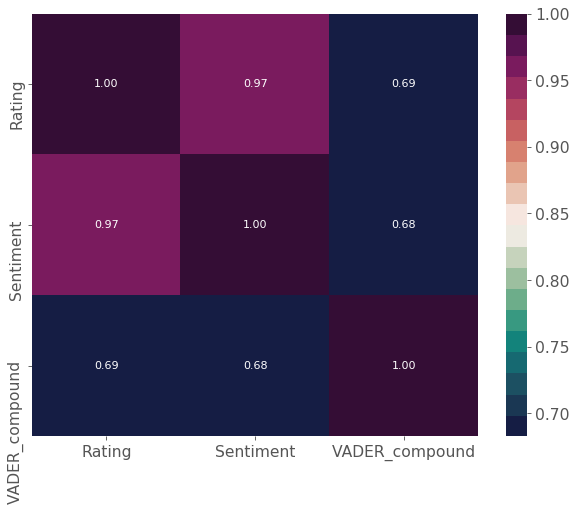

In [913]:
am_v2_corr=df_amazon_vader2.corr()
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=am_v2_corr,
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [914]:
min_max_scaler = MinMaxScaler(feature_range = (1,5),copy = 1)
df_imdb_vader=df_imdb_cleaned[['Review','Rating','Sentiment','VADER_compound']]
X_imdb_vader=df_imdb_vader['VADER_compound']
Y_imdb_vader=df_imdb_vader['Rating']
Y_imdb_vader=np.rint(min_max_scaler.fit_transform(Y_imdb_vader.values.reshape(-1,1)))
Y_imdb_vader=pd.Series(Y_imdb_vader.flatten())


train_linear_regression(X_imdb_vader,Y_imdb_vader)
train_gbm_regression(X_imdb_vader,Y_imdb_vader)
train_xgb_regression(X_imdb_vader,Y_imdb_vader)

Linear Regression
Mean accuracy:  0.21153298187992328
Mean MSE:  2.5960599999999996
Mean MAE:  1.35554
Mean RMSE:  1.6112043212013123
Mean R2-SCORE:  0.05346772637730126
Mean NRMSE 0.4028010803003281
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.23306927180460452
Mean MSE:  2.47952
Mean MAE:  1.2614
Mean RMSE:  1.5746090330574023
Mean R2-SCORE:  0.09595835234129778
Mean NRMSE 0.3936522582643506
---------------------------------
XGBoost regression
Mean accuracy:  0.23665529886552994
Mean MSE:  2.4766400000000006
Mean MAE:  1.26448
Mean RMSE:  1.5737074295105056
Mean R2-SCORE:  0.09700813494674222
Mean NRMSE 0.3934268573776264


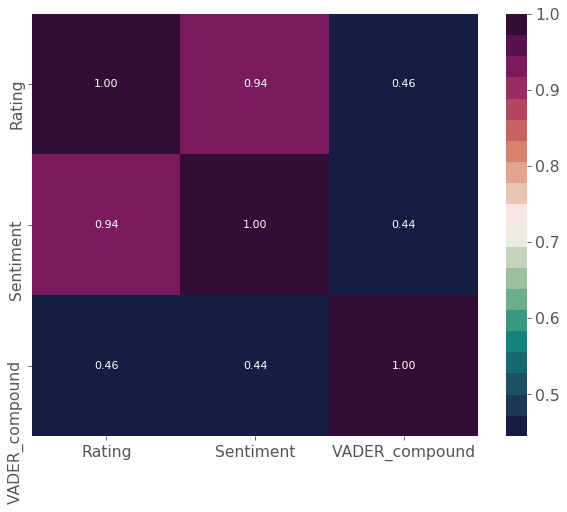

In [915]:
imdb_v_corr=df_imdb_vader.corr()
plt.figure(figsize=(9, 7),dpi=80)
sns.heatmap(data=imdb_v_corr,
            vmax=1.0,
            cmap=palettable.cmocean.diverging.Curl_20.mpl_colors,
            annot=True,
            fmt='.2f'       
           )

In [916]:
#baseline Naive Bayes
accuracy_am_list=[]
X_bsl=df_amazon_cleaned['Review']
Y_bsl= df_amazon_cleaned['Rating']
for train_idx, test_idx in stratifiedKFolds.split(X_bsl,Y_bsl):
    x_train, x_test = X_bsl.iloc[train_idx], X_bsl.iloc[test_idx]
    y_train, y_test = Y_bsl.iloc[train_idx], Y_bsl.iloc[test_idx]

    
    cv=TfidfVectorizer()
    vector_train=cv.fit_transform(x_train)
    vector_test=cv.transform(x_test)

    mnb=MultinomialNB()
    mnb.fit(vector_train,y_train)
    accuracy_am_list.append(mnb.score(vector_test,y_test))    
print('The Mean Accuracy of Classification: ',np.mean(accuracy_am_list))

The Mean Accuracy of Classification:  0.5763486765504929


In [917]:
accuracy_imdb_list=[]
X_bsl=df_imdb_cleaned['Review']
Y_bsl= df_imdb_cleaned['Rating']
for train_idx, test_idx in stratifiedKFolds.split(X_bsl,Y_bsl):
    x_train, x_test = X_bsl.iloc[train_idx], X_bsl.iloc[test_idx]
    y_train, y_test = Y_bsl.iloc[train_idx], Y_bsl.iloc[test_idx]

    
    cv=TfidfVectorizer()
    vector_train=cv.fit_transform(x_train)
    vector_test=cv.transform(x_test)

    mnb=MultinomialNB()
    mnb.fit(vector_train,y_train)
    accuracy_am_list.append(mnb.score(vector_test,y_test))    
print('The Mean Accuracy of Classification: ',np.mean(accuracy_imdb_list))

The Mean Accuracy of Classification:  nan


C:\Users\Frantol\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Frantol\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [918]:
X_amazon_nb=df_amazon_nb['Pos_prob']
Y_amazon_nb=df_amazon_nb['Rating']


train_linear_regression(X_amazon_nb,Y_amazon_nb)
train_gbm_regression(X_amazon_nb,Y_amazon_nb)
train_xgb_regression(X_amazon_nb,Y_amazon_nb)


Linear Regression
Mean accuracy:  0.5902662116672965
Mean MSE:  1.4343553520142822
Mean MAE:  0.8647985717612358
Mean RMSE:  1.1975342134562843
Mean R2-SCORE:  0.4638727460062513
Mean NRMSE 0.2993835533640711
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.594135113038323
Mean MSE:  1.433090118761158
Mean MAE:  0.8782969805169604
Mean RMSE:  1.1970254740190245
Mean R2-SCORE:  0.4643456666265228
Mean NRMSE 0.2992563685047561
---------------------------------
XGBoost regression
Mean accuracy:  0.5947528640215463
Mean MSE:  1.4338585733136693
Mean MAE:  0.8783978886905224
Mean RMSE:  1.1973360872545606
Mean R2-SCORE:  0.4640584484716001
Mean NRMSE 0.29933402181364016


In [919]:
X_amazon_nb2=df_amazon_nb2['Pos_prob']
Y_amazon_nb2=df_amazon_nb2['Rating']

train_linear_regression(X_amazon_nb2,Y_amazon_nb2)
train_gbm_regression(X_amazon_nb2,Y_amazon_nb2)
train_xgb_regression(X_amazon_nb2,Y_amazon_nb2)

Linear Regression
Mean accuracy:  0.6523382092687965
Mean MSE:  1.4631758048806578
Mean MAE:  0.9093612860194218
Mean RMSE:  1.2095090044639458
Mean R2-SCORE:  0.5274718057431775
Mean NRMSE 0.30237725111598646
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.6590383741878441
Mean MSE:  1.3774555253315106
Mean MAE:  0.8127414137281068
Mean RMSE:  1.1735212135961863
Mean R2-SCORE:  0.5551549600315152
Mean NRMSE 0.2933803033990466
---------------------------------
XGBoost regression
Mean accuracy:  0.659672710516287
Mean MSE:  1.377131284586971
Mean MAE:  0.8126333372664748
Mean RMSE:  1.1733730075100868
Mean R2-SCORE:  0.5552596731331877
Mean NRMSE 0.2933432518775217


In [920]:
min_max_scaler = MinMaxScaler(feature_range = (1,5),copy = 1)
X_imdb_nb=df_imdb_nb['Pos_prob']
Y_imdb_nb=df_imdb_nb['Rating']
Y_imdb_nb=np.rint(min_max_scaler.fit_transform(Y_imdb_nb.values.reshape(-1,1)))
Y_imdb_nb=pd.Series(Y_imdb_nb.flatten())


train_linear_regression(X_imdb_nb,Y_imdb_nb)
train_gbm_regression(X_imdb_nb,Y_imdb_nb)
train_xgb_regression(X_imdb_nb,Y_imdb_nb)

Linear Regression
Mean accuracy:  0.5944591506228424
Mean MSE:  1.4387599999999998
Mean MAE:  0.8722
Mean RMSE:  1.1994280076139936
Mean R2-SCORE:  0.47542216511323965
Mean NRMSE 0.2998570019034984
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.6047937857556557
Mean MSE:  1.35682
Mean MAE:  0.8044600000000001
Mean RMSE:  1.1647464340397062
Mean R2-SCORE:  0.5052976134346542
Mean NRMSE 0.29118660850992656
---------------------------------
XGBoost regression
Mean accuracy:  0.6060473129757582
Mean MSE:  1.35846
Mean MAE:  0.80478
Mean RMSE:  1.165460376110656
Mean R2-SCORE:  0.5046996878526786
Mean NRMSE 0.291365094027664


In [1105]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [1114]:
data = []
with gzip.open('AMAZON_FASHION_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

3176
{'overall': 5.0, 'verified': True, 'reviewTime': '09 4, 2015', 'reviewerID': 'ALJ66O1Y6SLHA', 'asin': 'B000K2PJ4K', 'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}, 'reviewerName': 'Tonya B.', 'reviewText': 'Great product and price!', 'summary': 'Five Stars', 'unixReviewTime': 1441324800}


In [1115]:
df_fashion=pd.DataFrame.from_dict(data)
df_fashion

overall  verified   reviewTime      reviewerID        asin  \
0         5.0      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
1         5.0      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
2         5.0      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
3         5.0      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
4         5.0      True   09 4, 2015   ALJ66O1Y6SLHA  B000K2PJ4K   
...       ...       ...          ...             ...         ...   
3171      5.0      True   07 2, 2018  A2077NII5H62R2  B005AGO4LU   
3172      5.0      True  06 28, 2018  A2IBS6PIPAGAB5  B005AGO4LU   
3173      5.0      True  06 25, 2018  A1GTC5EVSJNCQ8  B005AGO4LU   
3174      5.0      True  06 20, 2018  A311XHHLM12MUT  B005AGO4LU   
3175      5.0      True  06 16, 2018  A135SGOQMVWABQ  B005AGO4LU   

                                                  style     reviewerName  \
0      {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}         Tonya B.   
1     {'Size:': ' Big Boys', 'Color:': ' Black (3746...         Tonya B.   
2     {'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...         Tonya B.   
3     {'Size:': ' Big Boys', 'Color:': ' Blue (37867...         Tonya B.   
4        {'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}         Tonya B.   
...                                                 ...              ...   
3171  {'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...  Amazon Customer   
3172  {'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...         J. Avila   
3173  {'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...  Amazon Customer   
3174  {'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...            Peter   
3175  {'Size:': ' 9 B(M) US', 'Color:': ' Black/Whit...            Susan   

                                             reviewText      summary  \
0                              Great product and price!   Five Stars   
1                              Great product and price!   Five Stars   
2                              Great product and price!   Five Stars   
3                              Great product and price!   Five Stars   
4                              Great product and price!   Five Stars   
...                                                 ...          ...   
3171                                       Perfect fit!   Five Stars   
3172                        My favorite cross trainers!  Comfortable   
3173                              Love them fit perfect   Five Stars   
3174  Favorite Nike shoe ever! The flex sole is exce...   Love them!   
3175       I wear these everyday to work, the gym, etc.   Five Stars   

      unixReviewTime vote image  
0         1441324800  NaN   NaN  
1         1441324800  NaN   NaN  
2         1441324800  NaN   NaN  
3         1441324800  NaN   NaN  
4         1441324800  NaN   NaN  
...              ...  ...   ...  
3171      1530489600  NaN   NaN  
3172      1530144000  NaN   NaN  
3173      1529884800  NaN   NaN  
3174      1529452800  NaN   NaN  
3175      1529107200  NaN   NaN  

[3176 rows x 12 columns]

In [1116]:
print(len(df_fashion['reviewerID'].unique()))
print(len(df_fashion['asin'].unique()))

406
31


In [1117]:
df_fashion=df_fashion[['reviewerID','asin','reviewText','overall']]
df_fashion

reviewerID        asin  \
0      ALJ66O1Y6SLHA  B000K2PJ4K   
1      ALJ66O1Y6SLHA  B000K2PJ4K   
2      ALJ66O1Y6SLHA  B000K2PJ4K   
3      ALJ66O1Y6SLHA  B000K2PJ4K   
4      ALJ66O1Y6SLHA  B000K2PJ4K   
...              ...         ...   
3171  A2077NII5H62R2  B005AGO4LU   
3172  A2IBS6PIPAGAB5  B005AGO4LU   
3173  A1GTC5EVSJNCQ8  B005AGO4LU   
3174  A311XHHLM12MUT  B005AGO4LU   
3175  A135SGOQMVWABQ  B005AGO4LU   

                                             reviewText  overall  
0                              Great product and price!      5.0  
1                              Great product and price!      5.0  
2                              Great product and price!      5.0  
3                              Great product and price!      5.0  
4                              Great product and price!      5.0  
...                                                 ...      ...  
3171                                       Perfect fit!      5.0  
3172                        My favorite cross trainers!      5.0  
3173                              Love them fit perfect      5.0  
3174  Favorite Nike shoe ever! The flex sole is exce...      5.0  
3175       I wear these everyday to work, the gym, etc.      5.0  

[3176 rows x 4 columns]

In [1118]:
df_fashion_cleaned=df_fashion.copy()

In [1119]:
df_fashion['VADER_senti_values']=df_fashion.apply(lambda x: vader_senti_values(x['reviewText']),axis=1)
df_fashion['VADER_compound']=df_fashion['VADER_senti_values'].apply(lambda x: x['compound'])

D:\Anaconda2019.10\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda2019.10\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1120]:
df_fashion.corr()

overall  VADER_compound
overall         1.000000        0.544156
VADER_compound  0.544156        1.000000

In [1121]:
df_fashion_vader=df_fashion[['reviewText','asin','reviewerID','VADER_compound','overall']]
X_fashion_vader=df_fashion_vader['VADER_compound']
Y_fashion_vader=df_fashion_vader['overall']

train_linear_regression(X_fashion_vader,Y_fashion_vader)
train_gbm_regression(X_fashion_vader,Y_fashion_vader)
train_xgb_regression(X_fashion_vader,Y_fashion_vader)

Linear Regression
Mean accuracy:  0.29558251405086833
Mean MSE:  1.1470676348630042
Mean MAE:  0.9285350078368351
Mean RMSE:  1.0709164562785052
Mean R2-SCORE:  0.07142464918496941
Mean NRMSE 0.2677291140696263
---------------------------------
Gradient Boosting regression
Mean accuracy:  0.7337519533334398
Mean MSE:  0.9335595103466063
Mean MAE:  0.8164315616133961
Mean RMSE:  0.9650952175258183
Mean R2-SCORE:  0.1280781269338724
Mean NRMSE 0.24127380438145457
---------------------------------
XGBoost regression
Mean accuracy:  0.7330718497698097
Mean MSE:  0.9326161141201913
Mean MAE:  0.8167499950399778
Mean RMSE:  0.9645850415699302
Mean R2-SCORE:  0.12899968726421057
Mean NRMSE 0.24114626039248255


In [1122]:
df_fashion_vader

reviewText        asin  \
0                              Great product and price!  B000K2PJ4K   
1                              Great product and price!  B000K2PJ4K   
2                              Great product and price!  B000K2PJ4K   
3                              Great product and price!  B000K2PJ4K   
4                              Great product and price!  B000K2PJ4K   
...                                                 ...         ...   
3171                                       Perfect fit!  B005AGO4LU   
3172                        My favorite cross trainers!  B005AGO4LU   
3173                              Love them fit perfect  B005AGO4LU   
3174  Favorite Nike shoe ever! The flex sole is exce...  B005AGO4LU   
3175       I wear these everyday to work, the gym, etc.  B005AGO4LU   

          reviewerID  VADER_compound  overall  
0      ALJ66O1Y6SLHA          0.6588      5.0  
1      ALJ66O1Y6SLHA          0.6588      5.0  
2      ALJ66O1Y6SLHA          0.6588      5.0  
3      ALJ66O1Y6SLHA          0.6588      5.0  
4      ALJ66O1Y6SLHA          0.6588      5.0  
...              ...             ...      ...  
3171  A2077NII5H62R2          0.7574      5.0  
3172  A2IBS6PIPAGAB5          0.5093      5.0  
3173  A1GTC5EVSJNCQ8          0.8860      5.0  
3174  A311XHHLM12MUT          0.9570      5.0  
3175  A135SGOQMVWABQ          0.0000      5.0  

[3176 rows x 5 columns]

In [1123]:
from sklearn import preprocessing

In [1124]:
grouped=df_fashion_vader[['asin','VADER_compound']].groupby(['asin'])

mean_g=grouped.transform('mean')
std_g=grouped.transform('std')
max_g=grouped.transform('max')
min_g=grouped.transform('min')
diff_score=df_fashion_vader[['VADER_compound']]-min_g
diff=1+max_g-min_g
normalized=diff_score/diff

normalized

VADER_compound
0           0.397155
1           0.397155
2           0.397155
3           0.397155
4           0.397155
...              ...
3171        0.554990
3172        0.465439
3173        0.601408
3174        0.627035
3175        0.281610

[3176 rows x 1 columns]

In [1125]:
df_fashion_vader['asin_norm_comp']=normalized
df_fashion_vader=df_fashion_vader.dropna(how='any')
df_fashion_vader

reviewText        asin  \
0                              Great product and price!  B000K2PJ4K   
1                              Great product and price!  B000K2PJ4K   
2                              Great product and price!  B000K2PJ4K   
3                              Great product and price!  B000K2PJ4K   
4                              Great product and price!  B000K2PJ4K   
...                                                 ...         ...   
3171                                       Perfect fit!  B005AGO4LU   
3172                        My favorite cross trainers!  B005AGO4LU   
3173                              Love them fit perfect  B005AGO4LU   
3174  Favorite Nike shoe ever! The flex sole is exce...  B005AGO4LU   
3175       I wear these everyday to work, the gym, etc.  B005AGO4LU   

          reviewerID  VADER_compound  overall  asin_norm_comp  
0      ALJ66O1Y6SLHA          0.6588      5.0        0.397155  
1      ALJ66O1Y6SLHA          0.6588      5.0        0.397155  
2      ALJ66O1Y6SLHA          0.6588      5.0        0.397155  
3      ALJ66O1Y6SLHA          0.6588      5.0        0.397155  
4      ALJ66O1Y6SLHA          0.6588      5.0        0.397155  
...              ...             ...      ...             ...  
3171  A2077NII5H62R2          0.7574      5.0        0.554990  
3172  A2IBS6PIPAGAB5          0.5093      5.0        0.465439  
3173  A1GTC5EVSJNCQ8          0.8860      5.0        0.601408  
3174  A311XHHLM12MUT          0.9570      5.0        0.627035  
3175  A135SGOQMVWABQ          0.0000      5.0        0.281610  

[3160 rows x 6 columns]

In [1126]:
# normalized[normalized['VADER_compound']!=0]

In [ ]:
X_fashion_vader=df_fashion_vader['asin_norm_comp']
Y_fashion_vader=df_fashion_vader['overall']

train_linear_regression(X_fashion_vader,Y_fashion_vader)
train_gbm_regression(X_fashion_vader,Y_fashion_vader)
train_xgb_regression(X_fashion_vader,Y_fashion_vader)